
<CENTER>
<div style=width:600px;border-radius:10px;height:240px;background-color:#ffcccc;vertical-align:middle;;text-align:center;>
<br /><br />
<font size=14, font color=navy>Variables aléatoires
</div>
</CENTER>

# MODULES

## random

In [1]:
import random as rdd
#rdd.randrange()#de 1 à 3 paramètres
#rdd.randint
#rdd.choice(L)#rdd.choice(range(a,b))<-> randrange(a,b)
#rdd.shuffle(L)
#rdd.sample(L,k)# !=[rdd.choice(L) for i in range(k)]
#rdd.random()

In [2]:
L=['a','b','c','a']
B=L+[]
rdd.shuffle(B)
rdd.sample(L,4)
2+2*rdd.random()

3.7975984669929144

random simule aussi des variables aléatoire à densité

In [3]:
#L=[rdd.paretovariate(3) for i in range(10000)]
import numpy as np
def represente(L,c=0):
    def arrond(x):
        return round(float(x),c)
    M=map(arrond,L)
    m,n=max(M),min(M)
    eps=10**(-c)
    val=map(arrond,list(np.arange(n,m+eps,eps)))
    Y=[M.count(i)/float(len(M)) for i in val]
    plt.plot(val,Y)

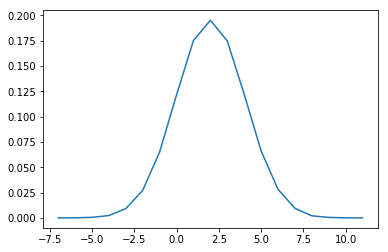

In [4]:
import matplotlib.pyplot as plt
plt.close()
L=[rdd.normalvariate(2,2) for i in range(100000)]#Il a aussi rdd.gauss
represente(L)
plt.show()

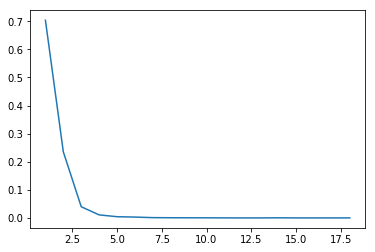

In [5]:
plt.close()
L=[rdd.paretovariate(3) for i in range(10000)]
represente(L)
plt.show()

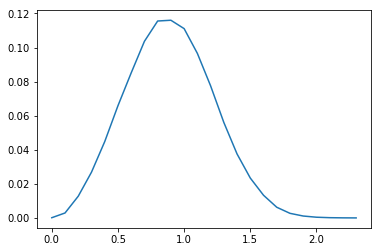

In [88]:
plt.close()
L=[rdd.weibullvariate(1,3) for i in range(100000)]
represente(L,1)
plt.show()

## numpy.random (Centrale)

### Choix uniformes

* randint
* random
* sample    
$\rightarrow$ paramètre optionnel : tirages multiples

In [6]:
import numpy as np
import numpy.random as rd
L=['a','b','c']
rd.sample(10)

array([ 0.31822899,  0.63006304,  0.32247454,  0.70268338,  0.71505012,
        0.31143314,  0.97607853,  0.77481226,  0.21883182,  0.92012826])

### Choix normal centré réduit

* randn (dimension $n\times p$)

In [182]:
rd.randn(1),rd.randn(2,3)

(array([-0.22068035]),
 array([[ -7.14877137e-01,   1.16380833e+00,   8.06489192e-04],
        [  2.67277779e-01,  -6.98623192e-01,  -1.73251568e-01]]))

### Mélanges aléatoires de listes

* shuffle 
* permutation   
<i>Attention</i> : sample(n) $\leftrightarrow$ rd.random(0,1,n)


In [185]:
L=['a','b','c']
rd.shuffle(L)
L

['c', 'a', 'b']

#### Choix aléatoires dans une liste

In [ ]:
#Creer une fonction


In [14]:
def choisit(n,L):
    p,M=len(L),[]
    for i in range(n):
        M.append(L[rd.randint(p)])
    return M

#### Choix exclusifs

In [89]:
#Creer une fonction

In [188]:
def choix_exclu(nb,L):
    M=[]
    if nb>len(L):
        raise ValueError("nombre trop grand")
    copL=L+[]
    for i in range(nb):
        M.append(copL.pop(rd.randint(len(copL))))
    return M
L=['a','v','n','j']
choix_exclu(3,L)
L

['a', 'v', 'n', 'j']

In [16]:
L=[1,6,7,9]
choix_exclu(3,L)

[7, 9, 1]

### Lois usuelles

* binomial(n,p)
* geometric(p)
* poisson(l)
* negative_binomial(n,p)

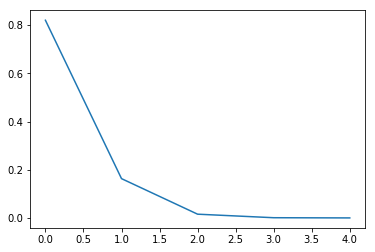

In [215]:
plt.close()
L=[rd.poisson(.2) for i in range(100000)]
represente(L)
plt.show()

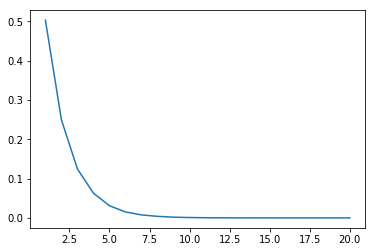

In [216]:
plt.close()
L=[rd.geometric(.5) for i in range(100000)]
represente(L)
plt.show()

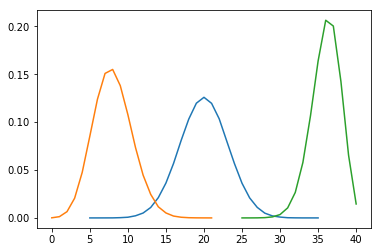

In [217]:
plt.close()
L1=[rd.binomial(40,.5) for i in range(500000)]
L2=[rd.binomial(40,.2) for i in range(500000)]
L3=[rd.binomial(40,.9) for i in range(500000)]
represente(L1),represente(L2),represente(L3)
plt.show()

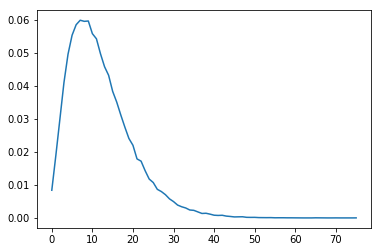

In [218]:
plt.close()
L=[rd.negative_binomial(3,.2) for i in range(100000)]
represente(L)
plt.show()

# GENERATEURS ALEATOIRES

* Générateur congruentiel linéaire
$$ x_{n+1} \equiv ax_n+b\; [m]$$

* a, b, m : grands entiers
    * a : multiplicateur
    * b : incrément
    * m : multiplicateur $\rightarrow$ puissance de $2$

* $(a,b,c)=(65539,0,2^{31})$ : algorithme RANDU
* $(a,b,c)=(31415821,1,10^8)$ : générateur de Sedgewick
* $(a,b,c)=(16807,0,2^31-1)$ : algorithme standard minimal

#### Initialisation : Seeding

* $x_0$ : horloge machine
* possibilité de réinitialiser la graine :$\verb"rdd.seed()"$

#### Python

* Inverseur de Mersenne (Mersenne's twister)
* $U_m()$ $\rightarrow$ entier de $[\!| 0, m-1|\!]$


#### Simulation

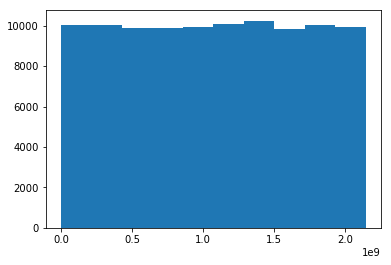

In [219]:
import numpy as np
import matplotlib.pyplot as plt
from __future__ import division

x0   = 14633
a,m = 7**5,2**31-1
#a=16807 et m=2147483647
N   = 10**5+1
data = [x0]


L=[x0]
for k in range(N):
    L.append((a*L[-1])%m)
L=np.array(L)
plt.close()
plt.hist(L)
L[2:10]
plt.show()

* $U=\frac{1}{m}U_m()$ : flottant aléatoire de $[0,1[$.
* $a+(b-a)U\hookrightarrow \mathcal{U}([a,b[)$.

In [220]:
def unifcontinu():
    return a+(b-a)*rd.random()

def unifdiscret():
    return p+np.floor((q-p+1)*rd.random())

In [221]:
def echantunifcontinu(n):
    return [unifcontinu() for i in range(n)]

def echantunifdiscret(n):
    return [unifdiscret() for i in range(n)]

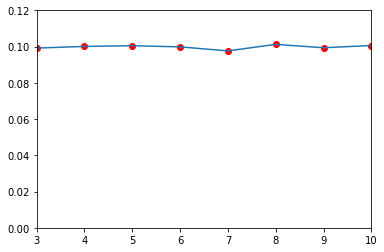

In [222]:
p=1
q=10

L=echantunifdiscret(10**5)

B=[L.count(i)/float(len(L)) for i in range(p,q+1)]
A=[i for i in range(p,q+1)]

plt.close()
plt.axis([3,10,0,.12])
plt.plot(A,B,'ro')
plt.plot(A,B)
#plt.savefig('unifdiscret.pdf')
plt.show()

# SIMULATIONS DE V.A.

* $X\colon \Omega \rightarrow X(\Omega)=\{ x_k\mid k \in K \}$
* $\hat{X}$ simule $X$ $\leftrightarrow$  renvoie $x_k$ avec la probabilité $P(X=x_k)=p_k$

Soit $U\hookrightarrow \mathcal{U}([0,1[)$.   
On découpe $[0,1[=\bigcup\limits_{k\in \mathbb{N}} I_k$ t.q. :
$$ p_k=\ell(I_k) $$

* $I_k=[S_{k-1},S_k[$ avec $S_{-1}=0$ et $S_k=\sum\limits_{i=0}^k p_i$.
* $\forall \omega \in \Omega,\; \exists ! k_\omega$, $U(\omega)\in I_{k_\omega}$    
    $\rightarrow$ $\hat{X}(\omega)=k_\omega$    
    $\rightarrow$ $\hat{X}=\sum\limits_{k=0}^{+\infty} k\mathbb{1}_{I_k}$

* On tire $a$ aléatoirement (random)
* On cherche $k$ tel que $S_{k-1}\leq a< S_k$ (boucle while)
* On renvoie $k$

#### Loi de Poisson

In [ ]:
#Code
import math
def petitpoisson(k):
    return math.exp(-l)*(l**k)/math.factorial(k)
l=1
#Poisson simule une loi de poisson

In [223]:
import math
#La fonction suivante donne la valeur de p_k
def petitpoisson(k):
    return math.exp(-l)*(l**k)/math.factorial(k)
l=1
#Poisson simule une loi de poisson
def Poisson():
    a=rd.random()
    S=0
    i=-1
    while (S<a):
        i=i+1
        S=S+petitpoisson(i)
    return i

In [224]:
#retourne un échantillon de valeurs simulées
def echantpoisson(n):
    return [Poisson() for i in range(n)]

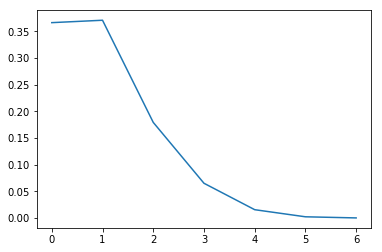

In [225]:
plt.close()
L=echantpoisson(10000)
represente(L)
plt.show()

#### Loi géométrique

In [ ]:
#Code

In [226]:
import math
p = 0.5

#La fonction suivante donne la valeur de p_k
def petitgeom(k):
    return p*(1-p)**(k-1)

#Geometrique simule une loi de geometrique
def Geometrique():
    a=rd.random()
    S=0
    i=0
    while (S<a):
        i=i+1
        S=S+petitgeom(i)
    return i

In [116]:
#retourne un échantillon de valeurs simulées
def echantgeometrique(n):
    return [Geometrique() for i in range(n)]

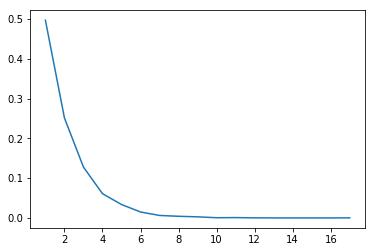

In [227]:
plt.close()
L=echantgeometrique(10000)
represente(L)
plt.show()

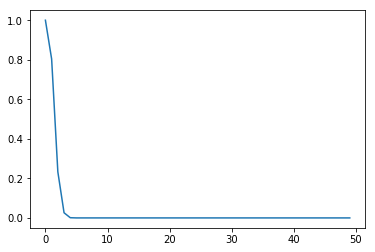

In [18]:
import matplotlib.pyplot as plt
n=5
k=4
def suite(p):
    accu=0
    N=10**3
    for j in range(N):
        val=sum([rd.randint(1,n+1) for i in range(p)])
        if val<=k:
            accu+=1
    return accu/float(N)


X=[i for i in range(0,50)]
Y=[suite(i) for i in range(0,50)]

plt.plot(X,Y)
plt.show()

In [14]:
def Y_3():
    L=[0,0,0]
    k=0
    while (sum(L)<3) and (k<=30):
        alea=rd.randint(3)
        if L[i]==0:
            L[i]+=1
        k+=1
    return k
        
def Y_2():
    L=[0,0,0]
    k=0
    while (sum(L)<2) and (k<=30):
        alea=rd.randint(3)
        if L[i]==0:
            L[i]+=1
        k+=1
    return k    

0